## WE11-Autoencoder
Name: Srinidhi Acharla

In [48]:
import numpy as np

# Common imports
import tensorflow as tf
from tensorflow import keras
import pandas as pd

np.random.seed(1)
tf.random.set_seed(1)

## Load the data

In [49]:
from tensorflow import keras
pretrained_model = keras.models.load_model('C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/initially_trained_for16_autoencoder.h5')

### Normalize the Data

In [50]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


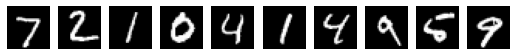

In [51]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

# Create an autoencoder model

In [52]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 16)                1616      
                                                                 
 dense_20 (Dense)            (None, 100)               1700      
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

# Train an autoencoding model

In [53]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.1968 - val_loss: 0.1419
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1314 - val_loss: 0.1228
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1188 - val_loss: 0.1134
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1114 - val_loss: 0.1079
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1073 - val_loss: 0.1052
Epoch 6/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1046 - val_loss: 0.1037
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1027 - val_loss: 0.1021
Epoch 8/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1012 - val_loss: 0.1008
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1000 - val_loss: 0.1004
Epoch 10/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0990 - val_lo

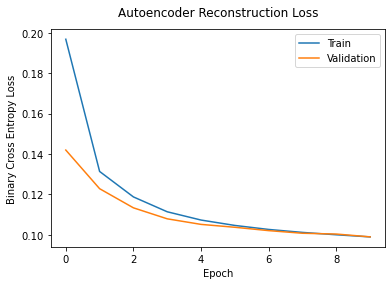

In [54]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

## Testing the autoencoding model

313/313 [==============================] - 1s 4ms/step


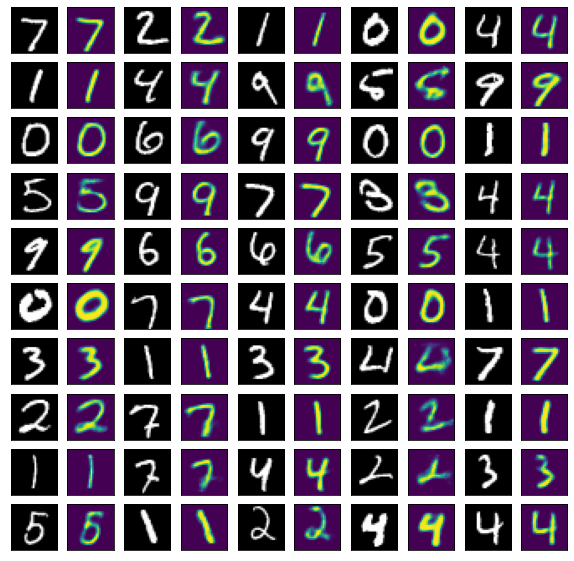

In [55]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [56]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [57]:
# Define target image size and color mode
from tensorflow.keras.preprocessing import image
target_size = (28, 28)
color_mode = "grayscale"
new_images = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image{i}.png"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_images.append(input_arr.reshape(784))

In [58]:

new_images = np.array(new_images)

# Duplicate new images to match size of MNIST dataset
new_images = np.repeat(new_images, 25, axis=0)

In [59]:

# Append new images to training data
train_images = np.vstack((train_images, new_images))
test_images=np.vstack((test_images,new_images))

# Get random indices for shuffling
random_indices = np.random.permutation(len(train_images))

# Shuffle training and test data
train_images = train_images[random_indices]

# Get random indices for shuffling
random_indices = np.random.permutation(len(test_images))

# Shuffle training and test data
test_images = test_images[random_indices]

In [60]:
train_images.shape

(60125, 784)

### Traning the autoencoder with new MINST DATASET with images

In [61]:
from tensorflow import keras
updated_model = keras.models.load_model('C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/initially_trained_for16_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images,test_images),
    callbacks=[early_stop]
)

Epoch 1/15
470/470 [==============================] - 10s 19ms/step - loss: 0.0805 - val_loss: 0.0812
Epoch 2/15
470/470 [==============================] - 8s 18ms/step - loss: 0.0796 - val_loss: 0.0805
Epoch 3/15
470/470 [==============================] - 9s 20ms/step - loss: 0.0789 - val_loss: 0.0797
Epoch 4/15
470/470 [==============================] - 8s 17ms/step - loss: 0.0783 - val_loss: 0.0793
Epoch 5/15
470/470 [==============================] - 9s 20ms/step - loss: 0.0780 - val_loss: 0.0795
Epoch 6/15
470/470 [==============================] - 13s 28ms/step - loss: 0.0775 - val_loss: 0.0782
Epoch 7/15
470/470 [==============================] - 10s 21ms/step - loss: 0.0770 - val_loss: 0.0786
Epoch 8/15
470/470 [==============================] - 10s 22ms/step - loss: 0.0767 - val_loss: 0.0775
Epoch 9/15
470/470 [==============================] - 10s 21ms/step - loss: 0.0764 - val_loss: 0.0772
Epoch 10/15
470/470 [==============================] - 8s 17ms/step - loss: 0.0761 - v

317/317 [==============================] - 2s 4ms/step


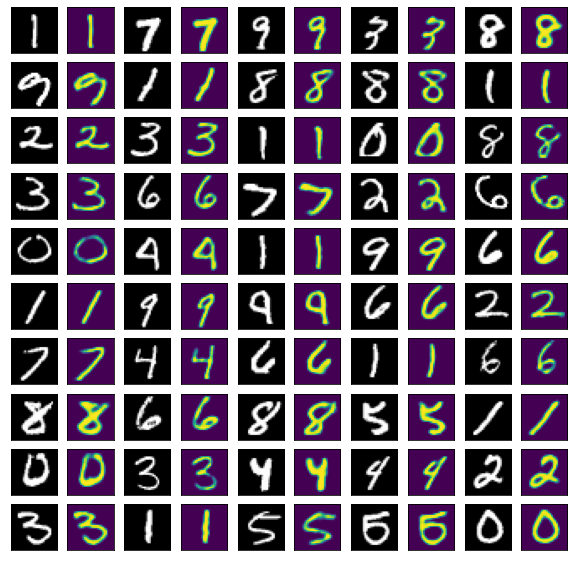

In [62]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(1000):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Image 1 test

1/1 [==============================] - 0s 35ms/step
(1, 784)


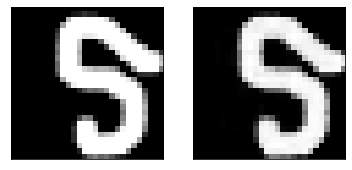

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image1.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# 2nd image

1/1 [==============================] - 0s 48ms/step
(1, 784)


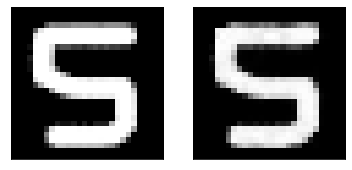

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image2.png" , target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


In [65]:
# Image 3 test

1/1 [==============================] - 0s 36ms/step
(1, 784)


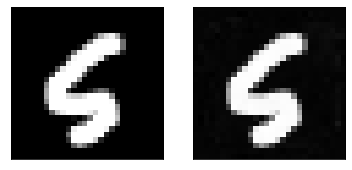

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image3.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


In [67]:
# Image 4 test

1/1 [==============================] - 0s 30ms/step
(1, 784)


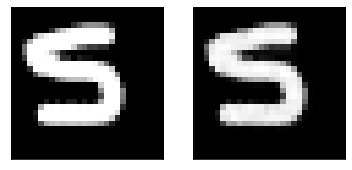

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image4.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Image 5 test

1/1 [==============================] - 0s 44ms/step
(1, 784)


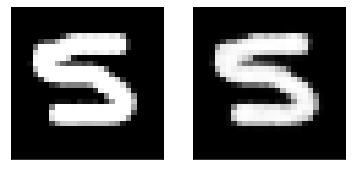

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img("C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/Image5.png", target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


317/317 [==============================] - 1s 4ms/step


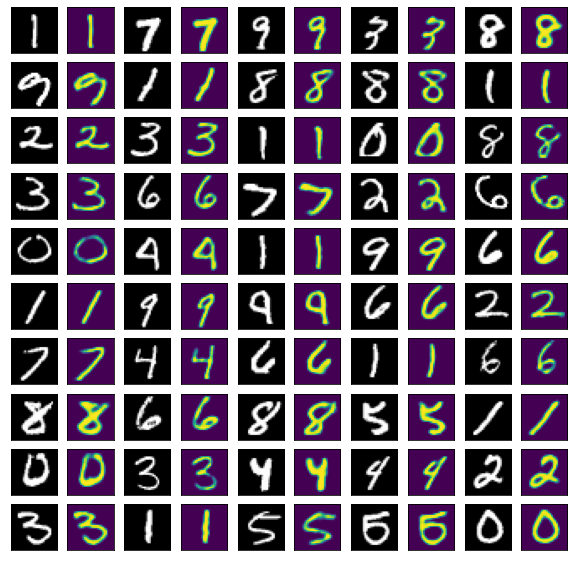

In [70]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [71]:
autoencoder.save('C:/Users/Srinidhi/Documents/USF/Data_Science_Programming/week11_assignment/trained_week11_autoencoder.h5')

### Inference:

As it can be seen above, the model could reconstruct the image when the dataset of minst along with the images are used.